In [ ]:
# install packages
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install holidays
import holidays
import os
from datetime import timedelta
#from google.colab import drive

# autogluon
!pip install autogluon==1.4.0
from autogluon.tabular import TabularPredictor

# visuals
!pip install sweetviz
import sweetviz as sv
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# evaluation metrics
# !pip install evaluate
# import evaluate

# display settings
pd.options.display.width = None
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


/usr/local/python/3.12.1/lib/python3.12/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


: 

# # **Import Data**
# https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp
# https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr

In [ ]:
# Import data
df = pd.read_parquet("/workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/T_ONTIME_REPORTING1.parquet")
# df1 = pd.read_csv("c:\\Users\\18594\\Documents\\HuggingFace_LiL_Course\\T_ONTIME_REPORTING1.csv")
# df2 = pd.read_csv("c:\\Users\\18594\\Documents\\HuggingFace_LiL_Course\\T_ONTIME_REPORTING2.csv")

# # Combine dataframes
# df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)

# Join to cancellation data. Note you are joining based on the ORIGIN airport!!!! NOTE: Could some feats come from destination???
#df = pd.merge(df,arp,how='left',left_on='ORIGIN',right_on='LocID')


# Sample the df for modeling
df = df.sample(n=10000, random_state=123)
df.columns = df.columns.str.lower() # make cols lower case
df.head()

# Feature ideas
# seasonality - around holiday
# carrier
# origin/destination airport
# day of week
# take off time
# accuracy metrics by airline
# direction of travel - east to west, pick up on tailwinds?
# either departing or arrival airport is a hub # https://www.faa.gov/airports/planning_capacity/categories
# nulls!!!!!!!!
# budget v non budget airlines

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 181188 to 49731
Columns: 109 entries, year to div5_tail_num
dtypes: float64(69), int64(21), object(19)
memory usage: 8.4+ MB


In [ ]:
df.describe()

,year,quarter,month,day_of_month,day_of_week,op_carrier_airline_id,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin_state_fips,origin_wac,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest_state_fips,dest_wac,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num
count,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9719.000000,9719.000000,9713.000000,9713.000000,10000.000000,9713.000000,9695.00000,9695.000000,9695.000000,9695.000000,10000.000000,10000.000000,10000.000000,9695.000000,9695.000000,10000.0,10000.000000,10000.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,70.000000,70.000000,70.000000,10000.000000,23.000000,18.000000,18.000000,23.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2025.0,1.0,1.0,15.698500,4.013500,19956.35850,2505.88700,12672.98870,1.267303e+06,31757.300100,26.594600,55.073700,12631.796400,1.263184e+06,31721.985400,26.602200,55.187800,1320.86190,1323.161526,10.433374,14.205737,0.177874,0.010693,19.245601,1351.026134,1477.684546,8.402141,1503.440200,1482.273242,4.07705,14.515008,0.187932,-0.304796,0.028200,0.002300,151.044300,145.503455,117.857143,1.0,839.688200,3.831700,24.591658,7.671789,14.854555,0.065862,25.060373,1182.528571,53.214286,50.857143,0.003200,0.782609,627.722222,528.555556,44.086957,12533.541667,1.253358e+06,1566.916667,47.833333,36.500000,1475.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,9.048546,1.924757,368.18712,1676.53807,1533.20226,1.533200e+05,1329.678324,17.029135,26.733091,1526.014798,1.526013e+05,1323.059554,16.926926,26.723711,487.03663,499.142780,63.614319,62.632278,0.382426,2.215275,11.577191,499.041547,522.376633,6.805421,509.987911,527.553681,66.09837,62.815106,0.390678,2.423033,0.165552,0.047906,73.342273,73.853256,71.953747,0.0,597.651484,2.335492,84.482110,61.184212,30.806570,1.359187,68.324376,498.949613,53.093544,48.830759,0.101935,0.421741,450.782301,437.039266,126.191382,1682.298246,1.682292e+05,550.272732,37.303301,31.618652,542.900516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2025.0,1.0,1.0,1.000000,1.000000,19393.00000,1.00000,10135.00000,1.013506e+06,30070.000000,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,5.00000,1.000000,-27.000000,0.000000,0.000000,-2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-74.00000,0.000000,0.000000,-2.000000,0.000000,0.000000,25.000000,18.000000,8.000000,1.0,31.00000

In [ ]:
# Cancellation Rate
df['cancelled'].value_counts(normalize=True)

cancelled
0.0    0.9718
1.0    0.0282
Name: proportion, dtype: float64

In [ ]:
# How many of each class
df['cancelled'].value_counts()

cancelled
0.0    9718
1.0     282
Name: count, dtype: int64

In [ ]:
df.shape

(10000, 109)

In [ ]:
# changes dtypes
df['cancelled'] = df['cancelled'].astype('category')
df['op_unique_carrier'] = df['op_unique_carrier'].astype('str')
df['op_carrier_airline_id'] = df['op_carrier_airline_id'].astype('str')
df['op_carrier'] = df['op_carrier'].astype('str')
df['op_carrier_fl_num'] = df['op_carrier_fl_num'].astype('str')

# if a col name starts with a given string, change dtype to string
for col in df.columns:
    if col.startswith('origin'):
        df[col] = df[col].astype('str')

for col in df.columns:
    if col.startswith('dest'):
        df[col] = df[col].astype('str')

df.dtypes

year                          int64
quarter                       int64
month                         int64
day_of_month                  int64
day_of_week                   int64
fl_date                      object
op_unique_carrier            object
op_carrier_airline_id        object
op_carrier                   object
tail_num                     object
op_carrier_fl_num            object
origin_airport_id            object
origin_airport_seq_id        object
origin_city_market_id        object
origin                       object
origin_city_name             object
origin_state_abr             object
origin_state_fips            object
origin_state_nm              object
origin_wac                   object
dest_airport_id              object
dest_airport_seq_id          object
dest_city_market_id          object
dest                         object
dest_city_name               object
dest_state_abr               object
dest_state_fips              object
dest_state_nm               

In [ ]:
# holidays
# full list of supported holidays in over 50 countries -> https://pypi.org/project/holidays/
# NOTE: Any I want to manually add?????????????????????????????
US_holidays = holidays.US()

# preview list of reocgnized holidays for the years in our dataset
# you might want to append other relevant holidays that are not recognized in this list that may have an effect on sales
# such as Black Friday in the US or company/industry-specific holidays (ex: valentine's day may be more relevant for a jewler than a furniture store)
years = [2022,2023,2024,2025,2026]
for date in holidays.US(years=years).items():
  print(date)

# save the holidays as a separate string to compare against the df
US_Holidays = []
for date in holidays.US(years=years).items():
   US_Holidays.append(str(date[0]))

# create a separare date value type so we can compare to the holidays string list
df['fl_date_dt'] =  pd.to_datetime(df['fl_date'])
# Check if the dates in the 'date' column are holidays
df['ind_is_holiday'] = df['fl_date_dt'].apply(lambda x: US_holidays.get(x.date()) is not None) # marks w true false
# # mark date as 1 if it falls on a US holiday, zero otherwise
df['ind_is_holiday'] = np.where(df['ind_is_holiday']==True, 1.0, 0.0)

# Check if the dates in the 'date' column are within X days of a holiday
df['ind_is_near_holiday_down'] = df['fl_date_dt'].apply(lambda x: any((x.date() - timedelta(days=i)) in US_holidays for i in range(3)))
df['ind_is_near_holiday_up'] = df['fl_date_dt'].apply(lambda x: any((x.date() + timedelta(days=i)) in US_holidays for i in range(3)))

df['ind_is_near_holiday'] = np.where((df['ind_is_near_holiday_down']==True) | (df['ind_is_near_holiday_up']==True), 1.0, 0.0)
#df.head(50)

(datetime.date(2022, 1, 1), "New Year's Day")
(datetime.date(2022, 5, 30), 'Memorial Day')
(datetime.date(2022, 6, 19), 'Juneteenth National Independence Day')
(datetime.date(2022, 6, 20), 'Juneteenth National Independence Day (observed)')
(datetime.date(2022, 7, 4), 'Independence Day')
(datetime.date(2022, 9, 5), 'Labor Day')
(datetime.date(2022, 11, 11), 'Veterans Day')
(datetime.date(2022, 11, 24), 'Thanksgiving Day')
(datetime.date(2022, 12, 25), 'Christmas Day')
(datetime.date(2022, 12, 26), 'Christmas Day (observed)')
(datetime.date(2022, 1, 17), 'Martin Luther King Jr. Day')
(datetime.date(2022, 2, 21), "Washington's Birthday")
(datetime.date(2022, 10, 10), 'Columbus Day')
(datetime.date(2023, 1, 1), "New Year's Day")
(datetime.date(2023, 1, 2), "New Year's Day (observed)")
(datetime.date(2023, 5, 29), 'Memorial Day')
(datetime.date(2023, 6, 19), 'Juneteenth National Independence Day')
(datetime.date(2023, 7, 4), 'Independence Day')
(datetime.date(2023, 9, 4), 'Labor Day')
(date

/tmp/ipykernel_36400/3040624679.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fl_date_dt'] =  pd.to_datetime(df['fl_date'])


In [ ]:
# Calculate proximity to/from a holiday
def days_until_next_holiday(flight_date, holiday_calendar):

    # Sort holiday list so that the next holiday can be found
    future_holidays = sorted([d for d in holiday_calendar if d >= flight_date.date()])

    # If there is no next holiday, return None (this shouldn't happen since we included future years)
    if not future_holidays:
        return None

    # Find the next holiday date
    next_holiday = future_holidays[0]

    # Calculate days difference
    days_diff = (next_holiday - flight_date.date()).days
    return days_diff

df['days_until_holiday'] = df['fl_date_dt'].apply(lambda x: days_until_next_holiday(x, US_holidays))


def days_since_last_holiday(flight_date, holiday_calendar):

    # Sort holiday list so that the next holiday can be found
    past_holidays = sorted([d for d in holiday_calendar if d <= flight_date.date()])

    # If there is no next holiday, return None (this shouldn't happen since we included prior years)
    if not past_holidays:
        return None

    # Find the next holiday date
    last_holiday = past_holidays[0]

    # Calculate days difference
    days_diff = (flight_date.date() - last_holiday).days
    return days_diff

df['days_since_last_holiday'] = df['fl_date_dt'].apply(lambda x: days_since_last_holiday(x, US_holidays))
df.head()

,year,quarter,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,origin_state_abr,origin_state_fips,origin_state_nm,origin_wac,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest,dest_city_name,dest_state_abr,dest_state_fips,dest_state_nm,dest_wac,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,fl_date_dt,ind_is_holiday,ind_is_near_holiday_down,ind_is_near_holiday_up,ind_is_near_holiday,days_until_holiday,days_since_last_holiday
181188,2025,1,1,11,6,1/11/2025 12:00:00 AM,AA,19805,AA,N189UW,2961,12889,1288904,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,1003,1004.0,1.0,1.0,0.0,0.0,1000-1059,19.0,1023.0,1715.0,12.0,1742,1727.0,-15.0,0.0,0.0,-1.0,1700-1759,0.0,None,0.0,279.0,263.0,232.0,1.0,2174.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-11,0.0,False,False,0.0,9,10
344714,2025,1,1,20,1,1/20/2025 12:00:00 AM,UA,19977,UA,N24706,739,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,13930,1393008,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1520,1520.0,0.0,0.0,0.0,0.0,1500-1559,22.0,1542.0,1654.0,13.0,1710,1707.0,-3.0,0.0,0.0,-1.0,1700-1759,0.0,None,0.0,110.0,107.0,72.0,1.0,416.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-20,1.0,True,True,1.0,0,19
385780,2025,1,1,23,4,1/23/2025 12:00:00 AM,AA,19805,AA,N989NN,2348,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1448,1446.0,-2.0,0.0,0.0,-1.0,1400-1459,10.0,1456.0,1723.0,12.0,1730,1735.0,5.0,5.0,0.0,0.0,1700-1759,0.0,None,0.0,222.0,229.0,207.0,1.0,1158.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-23,0.0,False,False,0.0,25,22
22986,2025,1,1,2,4,1/2/2025 12:00:00 AM,DL,19790,DL,N906AT,1555,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11986,1198603,31986,GRR,"Grand Rapids, MI",MI,26,Michigan,43,1515,1508.0,-7.0,0.0,0.0,-1.0,1500-1559,24.0,1532.0,1732.0,2.0,1738,1734.0,-4.0,0.0,0.0,-1.0,1700-1759,0.0,None,0.0,83.0,86.0,60.0,1.0,408.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20

# # **Feature Creations**

In [ ]:
# Check for missing values, impute where necessary
df.isnull().sum()

year                            0
quarter                         0
month                           0
day_of_month                    0
day_of_week                     0
fl_date                         0
op_unique_carrier               0
op_carrier_airline_id           0
op_carrier                      0
tail_num                       41
op_carrier_fl_num               0
origin_airport_id               0
origin_airport_seq_id           0
origin_city_market_id           0
origin                          0
origin_city_name                0
origin_state_abr                0
origin_state_fips               0
origin_state_nm                 0
origin_wac                      0
dest_airport_id                 0
dest_airport_seq_id             0
dest_city_market_id             0
dest                            0
dest_city_name                  0
dest_state_abr                  0
dest_state_fips                 0
dest_state_nm                   0
dest_wac                        0
crs_dep_time  

In [ ]:
# get hour from departure and arrival times
df['scheduled_hour_of_departure'] = df['crs_dep_time'].astype(str).str.zfill(4).str.slice(0, 2).astype(int)
df['scheduled_hour_of_arrival'] = df['crs_arr_time'].astype(str).str.zfill(4).str.slice(0, 2).astype(int)

# indicator variables
#df['ind_is_local'] = np.where(df['role\n(fy25)'] == 'Local', 1, 0) # maybe these airports dont have many resources to prevent cancellations if something goes wrong
df['ind_is_summer'] = np.where((df['month'] >= 6) & (df['month'] <= 8), 1, 0)
df['ind_late_scheduled_hour_of_departure'] = np.where((df['scheduled_hour_of_departure'] >= 20) & (df['scheduled_hour_of_departure'] <= 22), 1, 0)
df['ind_late_scheduled_hour_of_arrival'] = np.where((df['scheduled_hour_of_arrival'] >= 21) & (df['scheduled_hour_of_arrival'] <= 23), 1, 0)
df['ind_early_departure'] = np.where(df['dep_delay'] < 0, 1, 0)

df.head()

,year,quarter,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,origin_state_abr,origin_state_fips,origin_state_nm,origin_wac,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest,dest_city_name,dest_state_abr,dest_state_fips,dest_state_nm,dest_wac,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,fl_date_dt,ind_is_holiday,ind_is_near_holiday_down,ind_is_near_holiday_up,ind_is_near_holiday,days_until_holiday,days_since_last_holiday,scheduled_hour_of_departure,scheduled_hour_of_arrival,ind_is_summer,ind_late_scheduled_hour_of_departure,ind_late_scheduled_hour_of_arrival,ind_early_departure
181188,2025,1,1,11,6,1/11/2025 12:00:00 AM,AA,19805,AA,N189UW,2961,12889,1288904,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,1003,1004.0,1.0,1.0,0.0,0.0,1000-1059,19.0,1023.0,1715.0,12.0,1742,1727.0,-15.0,0.0,0.0,-1.0,1700-1759,0.0,None,0.0,279.0,263.0,232.0,1.0,2174.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-11,0.0,False,False,0.0,9,10,10,17,0,0,0,0
344714,2025,1,1,20,1,1/20/2025 12:00:00 AM,UA,19977,UA,N24706,739,13871,1387102,33316,OMA,"Omaha, NE",NE,31,Nebraska,65,13930,1393008,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1520,1520.0,0.0,0.0,0.0,0.0,1500-1559,22.0,1542.0,1654.0,13.0,1710,1707.0,-3.0,0.0,0.0,-1.0,1700-1759,0.0,None,0.0,110.0,107.0,72.0,1.0,416.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-20,1.0,True,True,1.0,0,19,15,17,0,0,0,0
385780,2025,1,1,23,4,1/23/2025 12:00:00 AM,AA,19805,AA,N989NN,2348,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1448,1446.0,-2.0,0.0,0.0,-1.0,1400-1459,10.0,1456.0,1723.0,12.0,1730,1735.0,5.0,5.0,0.0,0.0,1700-1759,0.0,None,0.0,222.0,229.0,207.0,1.0,1158.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-23,0.0,False,False,0.0,25,22,14,17,0,0,0,1
22986,2025,1,1,2,4,1/2/2025 12:00:00 AM,DL,19790,DL,N906AT,1555,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11986,1198603,31986,GRR,"Grand Rapids, MI",MI,26,Michigan,43,1515,1508.0,-7.0,0.0,0.0,-1.0,1500-1559,24.0,1532.0,1732.0,2.0,1738,1734.0,-4.0,0.0,0.0,-1.0,1700-1759,0.0,None,0.0,83.0,86.0,60.0,1.0,408.0,2,NaN,NaN,NaN,Na

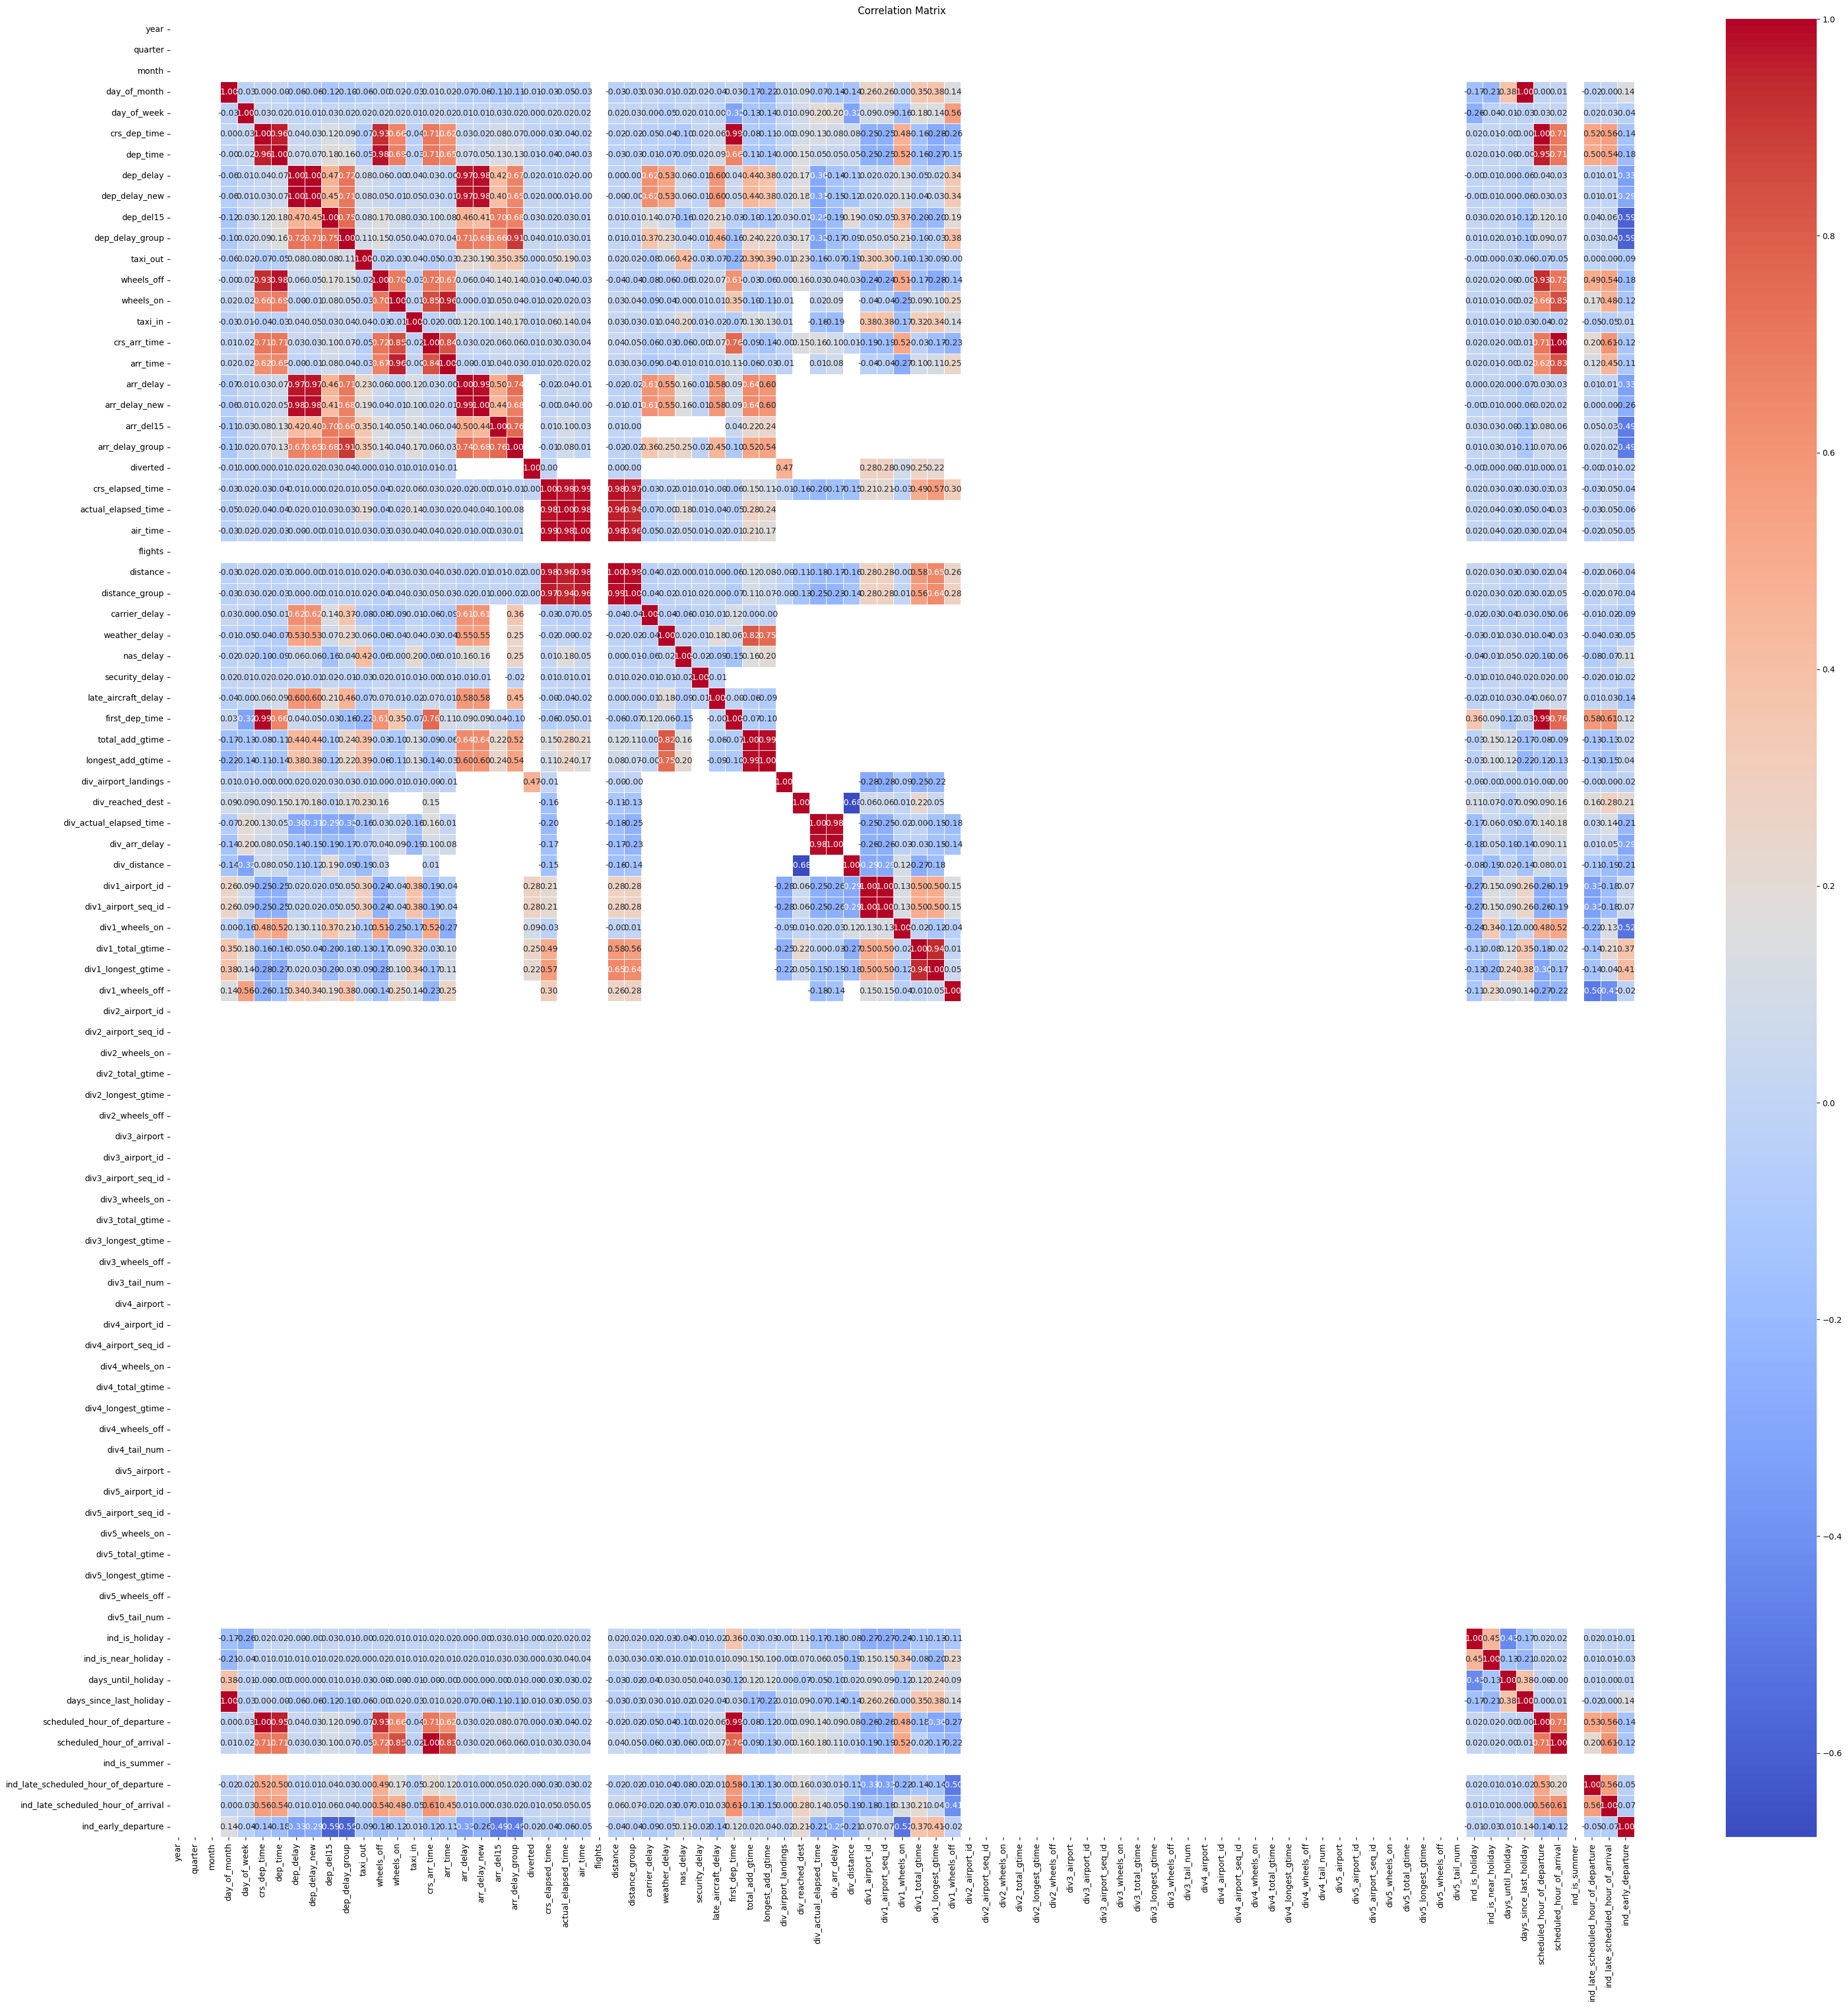

In [ ]:
# Correlation Matrix
# Select numeric cols only
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# # **AutoGluon**
# -- Notice here that the train test split looks a little different than what you weould see from sklearn. You do not have to explicitly separate out X from y
# - label = target variable
# - eval metric - this is the metric you want to prioritize in the trainig phases

In [ ]:
# Keep only variables of interest
#df.columns.tolist() # can use this to get list of all cols, then paste below + flexibly comment in and out what you want to send through the model
df = df[[

# date/time features
'year',
 'quarter',
 'month',
 'day_of_month',
 'day_of_week',
 'scheduled_hour_of_departure',
 'scheduled_hour_of_arrival',
  'fl_date_dt',

 # 'op_unique_carrier', # use for airline carrier
#  'op_carrier_airline_id',
#  'op_carrier',
# 'tail_num', # unique identifier for the aircraft
#  'op_carrier_fl_num',
#  'origin_airport_id',
#  'origin_airport_seq_id',
#  'origin_city_market_id',
 'origin',
#  'origin_city_name',
#  'origin_state_abr',
#  'origin_state_fips',
#  'origin_state_nm',
#  'origin_wac',
#  'dest_airport_id',
#  'dest_airport_seq_id',
#  'dest_city_market_id',
 'dest',
#  'dest_city_name',
#  'dest_state_abr',
#  'dest_state_fips',
#  'dest_state_nm',
#  'dest_wac',
# 'crs_dep_time', # converted into scheduled departure hour
# 'dep_time', # actual departure time, redundant with dep delay
 'dep_delay', # early departures are negative
 'dep_delay_new', # What is the difference between this and dep delay? is one a better predictor than the other?
 'dep_del15',
 'dep_delay_group',
 # 'dep_time_blk',
 # 'taxi_out', # not known pre flight
 # 'wheels_off', # not known pre flight
 # 'wheels_on', # not informative
 'taxi_in',
# 'crs_arr_time',  # converted into scheduled arrival hour
#  'arr_time', # not known pre flight
#  'arr_delay', # not known pre flight
#  'arr_delay_new', # not known pre flight
#  'arr_del15', # not known pre flight
#  'arr_delay_group', # not known pre flight
#  'arr_time_blk', # not known pre flight
 'cancelled', # TARGET VARIABLE, DO NOT REMOVE
 # 'cancellation_code', # LEAKAGE, DO NOT INCLUDE
 # 'diverted', # would not necessarily be known at the time of flight
 'crs_elapsed_time', # estimated time of scheduled flight
# 'actual_elapsed_time',  # not known pre flight
 # 'air_time', # not known pre flight
 'flights',
 'distance', # Distance between airports (miles)
 'distance_group',
 'carrier_delay', # in Minutes
 'weather_delay', # in Minutes
 'nas_delay', # National Air System Delay, in Minutes
 'security_delay', # in Minutes
 'late_aircraft_delay', # in Minutes
# 'first_dep_time',
#  'total_add_gtime', # do not use, data leakage
#  'longest_add_gtime', # do not use, data leakage

  # Diverted flight features - removing these bc this information is not necessarily known at time of flight - not sure if this info is collected in real time, or only after flight is complete
#  'div_airport_landings',
#  'div_reached_dest',
#  'div_actual_elapsed_time',
#  'div_arr_delay',
#  'div_distance',
#  'div1_airport',
#  'div1_airport_id',
#  'div1_airport_seq_id',
#  'div1_wheels_on',
#  'div1_total_gtime',
#  'div1_longest_gtime',
#  'div1_wheels_off',
#  'div1_tail_num',
#  'div2_airport',
#  'div2_airport_id',
#  'div2_airport_seq_id',
#  'div2_wheels_on',
#  'div2_total_gtime',
#  'div2_longest_gtime',
#  'div2_wheels_off',
#  'div2_tail_num',
#  'div3_airport',
#  'div3_airport_id',
#  'div3_airport_seq_id',
#  'div3_wheels_on',
#  'div3_total_gtime',
#  'div3_longest_gtime',
#  'div3_wheels_off',
#  'div3_tail_num',
#  'div4_airport',
#  'div4_airport_id',
#  'div4_airport_seq_id',
#  'div4_wheels_on',
#  'div4_total_gtime',
#  'div4_longest_gtime',
#  'div4_wheels_off',
#  'div4_tail_num',
#  'div5_airport',
#  'div5_airport_id',
#  'div5_airport_seq_id',
#  'div5_wheels_on',
#  'div5_total_gtime',
#  'div5_longest_gtime',
#  'div5_wheels_off',
#  'div5_tail_num',

# HOLIDAYS
 'ind_is_holiday',
 'ind_is_near_holiday_down',
 'ind_is_near_holiday_up',
 'ind_is_near_holiday',
 'days_until_holiday',
 'days_since_last_holiday',
 'ind_is_summer',

# OTHER IND VARIABLES
 'ind_late_scheduled_hour_of_departure',
 'ind_late_scheduled_hour_of_arrival',
 'ind_early_departure'
]]
df.fillna(0)
df.head()



,year,quarter,month,day_of_month,day_of_week,scheduled_hour_of_departure,scheduled_hour_of_arrival,fl_date_dt,origin,dest,dep_delay,dep_delay_new,dep_del15,dep_delay_group,taxi_in,cancelled,crs_elapsed_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,ind_is_holiday,ind_is_near_holiday_down,ind_is_near_holiday_up,ind_is_near_holiday,days_until_holiday,days_since_last_holiday,ind_is_summer,ind_late_scheduled_hour_of_departure,ind_late_scheduled_hour_of_arrival,ind_early_departure
181188,2025,1,1,11,6,10,17,2025-01-11,LAS,MIA,1.0,1.0,0.0,0.0,12.0,0.0,279.0,1.0,2174.0,9,NaN,NaN,NaN,NaN,NaN,0.0,False,False,0.0,9,10,0,0,0,0
344714,2025,1,1,20,1,15,17,2025-01-20,OMA,ORD,0.0,0.0,0.0,0.0,13.0,0.0,110.0,1.0,416.0,2,NaN,NaN,NaN,NaN,NaN,1.0,True,True,1.0,0,19,0,0,0,0
385780,2025,1,1,23,4,14,17,2025-01-23,RIC,DFW,-2.0,0.0,0.0,-1.0,12.0,0.0,222.0,1.0,1158.0,5,NaN,NaN,NaN,NaN,NaN,0.0,False,False,0.0,25,22,0,0,0,1
22986,2025,1,1,2,4,15,17,2025-01-02,MSP,GRR,-7.0,0.0,0.0,-1.0,2.0,0.0,83.0,1.0,408.0,2,NaN,NaN,NaN,NaN,NaN,0.0,True,False,1.0,18,1,0,0,0,1
387636,2025,1,1,23,4,19,22,2025-01-23,MCO,DCA,-6.0,0.0,0.0,-1.0,4.0,0.0,132.0,1.0,759.0,4,NaN,NaN,NaN,NaN,NaN,0.0,False,False,0.0,25,22,0,0,1,1


In [ ]:
# # Sample and split the data into train and test sets
from sklearn.model_selection import train_test_split
df = df.sample(n=10000)
train, test = train_test_split(df, test_size=0.4, train_size=0.6, random_state=123)

(10000, 35)

In [ ]:
df['cancelled'].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False, categories_dtype=float64)

In [ ]:
train['cancelled'].value_counts()

cancelled
0.0    5825
1.0     175
Name: count, dtype: int64

In [ ]:
test['cancelled'].value_counts()

cancelled
0.0    3893
1.0     107
Name: count, dtype: int64

In [ ]:
# make sure we are using TabPFNMix
# https://dataloop.ai/library/model/autogluon_tabpfn-mix-10-regressor/
# tabpfnmix_cfg = {
#     "model_path_regressor": "autogluon/tabpfn-mix-1.0-regressor",
#     "n_ensembles": 1,
#     "max_epochs": 10, # NOTE: change this
# }

# hyperparameters = {
#     "TABPFNMIX": [tabpfnmix_cfg]
# }

tabpfnmix_default = {
    #"model_path_classifier": "autogluon/tabpfn-mix-1.0-classifier",
    "model_path_regressor": "autogluon/tabpfn-mix-1.0-regressor",
    "n_ensembles": 1,
    "max_epochs": 30,
}

hyperparameters = {
    "TABPFNMIX": [
        tabpfnmix_default,
    ],
}

# Fit the model
predictor = TabularPredictor(label='cancelled', eval_metric='roc_auc').fit(
    train_data=train,
    #tuning_data=test,
    hyperparameters=hyperparameters,
    presets=None,
    # use_bag_holdout=True,
    # num_bag_folds=0,
    # num_bag_sets=0,
    # num_stack_levels=0,
    verbosity = 4, # determines how detailed you want output logs to be
    #ag_args_fit={"ag.max_memory_usage_ratio": 5} # optional, helps prevent out of memory errors
)

NameError: name 'TabularPredictor' is not defined

In [ ]:
predictor.fit_summary()


Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/AutogluonModels/ag-20251025_211954/models/LightGBMXT/model.pkl
Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/AutogluonModels/ag-20251025_211954/models/LightGBM/model.pkl
Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/AutogluonModels/ag-20251025_211954/models/RandomForestGini/model.pkl
Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/AutogluonModels/ag-20251025_211954/models/RandomForestEntr/model.pkl
Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/AutogluonModels/ag-20251025_211954/models/CatBoost/model.pkl
Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-4077220/AutogluonModels/ag-20251025_211954/models/ExtraTreesGini/model.pkl
Loading: /workspaces/build-with-ai-executing-and-evaluating-hugging-face-models-40

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBM   1.000000     roc_auc       0.004067   0.726548                0.004067           0.726548            1       True          2
1              CatBoost   1.000000     roc_auc       0.006489   8.278259                0.006489           8.278259            1       True          5
2               XGBoost   1.000000     roc_auc       0.007741   7.028654                0.007741           7.028654            1       True          9
3         LightGBMLarge   1.000000     roc_auc       0.023844   1.650350                0.023844           1.650350            1       True         11
4            LightGBMXT   1.000000     roc_auc       0.028361   2.712052                0.028361           2.712052            1       True          1
5   WeightedEnsemble_L2   1.0000

/usr/local/python/3.12.1/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT': np.float64(1.0),
  'LightGBM': np.float64(1.0),
  'RandomForestGini': np.float64(0.99989910200787),
  'RandomForestEntr': np.float64(0.99989910200787),
  'CatBoost': np.float64(1.0),
  'ExtraTreesGini': np.float64(0.9991928160629603),
  'ExtraTreesEntr': np.float64(0.9990919180708304),
  'NeuralNetFastAI': np.float64(0.9980829381495309),
  'XGBoost': np.float64(1.0),
  'NeuralNetTorch': np.float64(0.9771970537786298),
  'LightGBMLarge': np.float64(1.0),
  'WeightedEnsemble_L2': np.float64(1.0)},
 'model_best': 'WeightedEnse